In [1]:
from store import *

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Insret your kaspad DB path here (must be a copy w/o kaspad running over it)
# db_path = r'C:\Users\msssu\AppData\Local\Kaspad\kaspa-mainnet\ibd-pruning-bug\kaspad-test2\kaspa-mainnet\datadir2'
db_path = r'D:\kaspad-data\datadir2-cp-10.12.00.47AM'
store = Store(db_path)

In [8]:
store.load_blocks()

Pruning point:  be4c415d378f9113fabd3c09fcc84ddb6a00f900c87cb6a1186993ddc3014e2d
Loaded 40000 blocks
Loaded 80000 blocks
Loaded 120000 blocks
Loaded 160000 blocks
Loaded 200000 blocks
Loaded 240000 blocks
Overall number of headers:  268258


In [ ]:
df = pd.DataFrame(store.load_data(['timeInMilliseconds'], ['pubkey_script']))
df_grouped = df.groupby('pubkey_script')

In [6]:
data = sorted(len(v) for v in grouped.values())
grouped_sorted = sorted(grouped.items(), key=lambda kvp: len(kvp[1]))
# grouped_sorted

In [56]:
len(data)

416

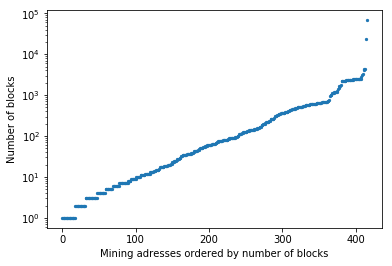

In [59]:
plt.figure(figsize=(6, 4))
plt.scatter(np.arange(0, len(data)), np.array(data), s=5)
plt.yscale('log')
plt.ylabel('Number of blocks')
plt.xlabel('Mining adresses ordered by number of blocks')
# plt.title('Mining distribution')
plt.savefig(r'mining.png')
plt.show()

In [57]:
top_miner_timestamps = grouped_sorted[-1][1]
len(top_miner_timestamps)

67693

In [9]:
top_miner_timestamps = sorted(top_miner_timestamps)
intervals = []
for i in range(len(top_miner_timestamps) - 1):
    intervals.append(top_miner_timestamps[i+1] - top_miner_timestamps[i])
intervals = sorted(intervals)
print(intervals[-10])
intervals = intervals[:-10] 

33283


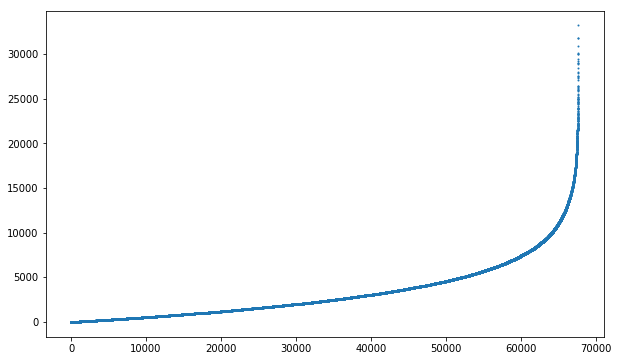

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(0, len(intervals)), intervals, s=1)
plt.show()

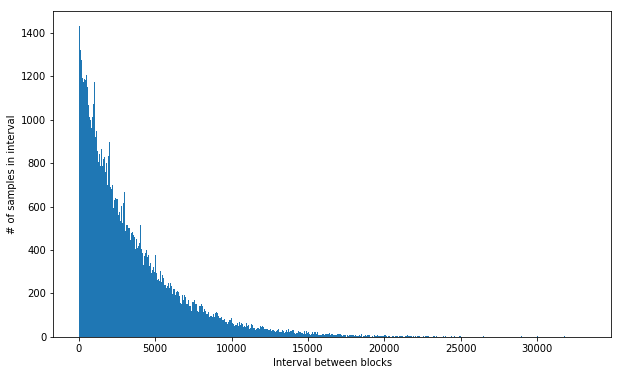

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(intervals, bins=500)
plt.ylabel('# of samples in interval')
plt.xlabel('Interval between blocks (ms)')
# plt.title('Mining distribution')
plt.savefig(r'intervals.png')
plt.show()

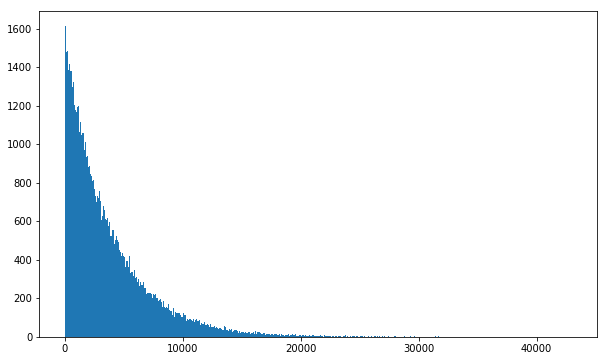

In [12]:
sample = np.random.exponential(len(self.blocks)/len(top_miner_timestamps), len(top_miner_timestamps))*1000
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=500)
plt.show()

In [36]:
self.close()